In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.
https://stackoverflow.com/questions/22991567/pandas-yahoo-finance-datareader

In [ ]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import datetime
import pandas_datareader.data as web
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2018, 12, 31)
"""df = web.DataReader("AAPL", 'yahoo', start, end)
dates =[]
for x in range(len(df)):
    newdate = str(df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)

df['dates'] = pd.to_datetime(dates, format='%Y-%m-%d')"""
df = pd.read_csv("AAPL.csv")
print (df.head())
print (df.tail())

         Date        Open        High         Low       Close   Adj Close  \
0  2021-11-17  151.000000  155.000000  150.990005  153.490005  152.604324   
1  2021-11-18  153.710007  158.669998  153.050003  157.869995  156.959030   
2  2021-11-19  157.649994  161.020004  156.529999  160.550003  159.623581   
3  2021-11-22  161.679993  165.699997  161.000000  161.020004  160.090866   
4  2021-11-23  161.119995  161.800003  159.059998  161.410004  160.478638   

      Volume  
0   88807000  
1  137827700  
2  117305600  
3  117467900  
4   96041900  
           Date        Open        High         Low       Close   Adj Close  \
247  2022-11-10  141.240005  146.869995  139.500000  146.869995  146.869995   
248  2022-11-11  145.820007  150.009995  144.369995  149.699997  149.699997   
249  2022-11-14  148.970001  150.279999  147.429993  148.279999  148.279999   
250  2022-11-15  152.220001  153.589996  148.559998  150.039993  150.039993   
251  2022-11-16  149.130005  149.869995  147.289993 

In [ ]:
Q1 = np.percentile(df['High'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['High'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper = df['High'] >= (Q3+1.5*IQR)
 
print(np.where(upper))
 
# Below Lower bound
lower = df['High'] <= (Q1-1.5*IQR)
print(np.where(lower))

(array([], dtype=int64),)
(array([], dtype=int64),)


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

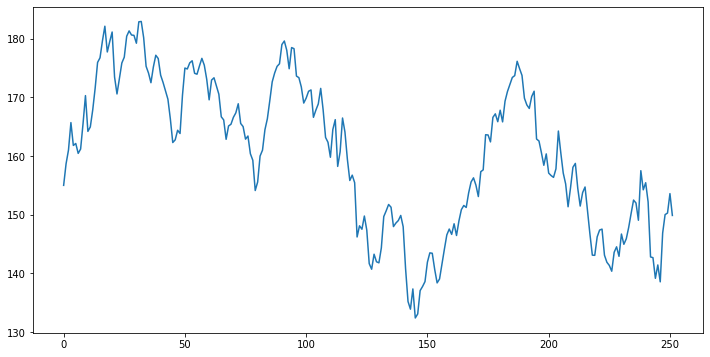

In [ ]:
df.High.plot(figsize=(12,6))

## Лабораторная работа №5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

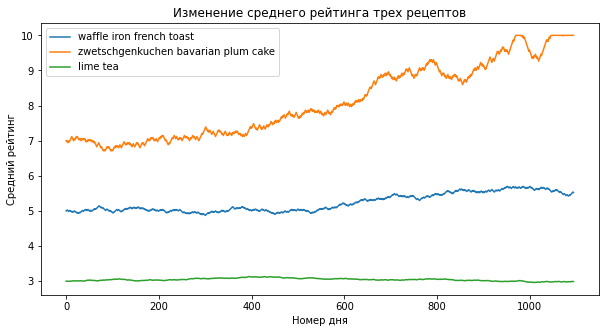

In [ ]:
data = np.load('average_ratings.npy')
plt.figure(figsize=(10, 5))
plt.plot(data[0], label='waffle iron french toast')
plt.plot(data[1], label='zwetschgenkuchen bavarian plum cake')
plt.plot(data[2], label='lime tea')
plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.legend();

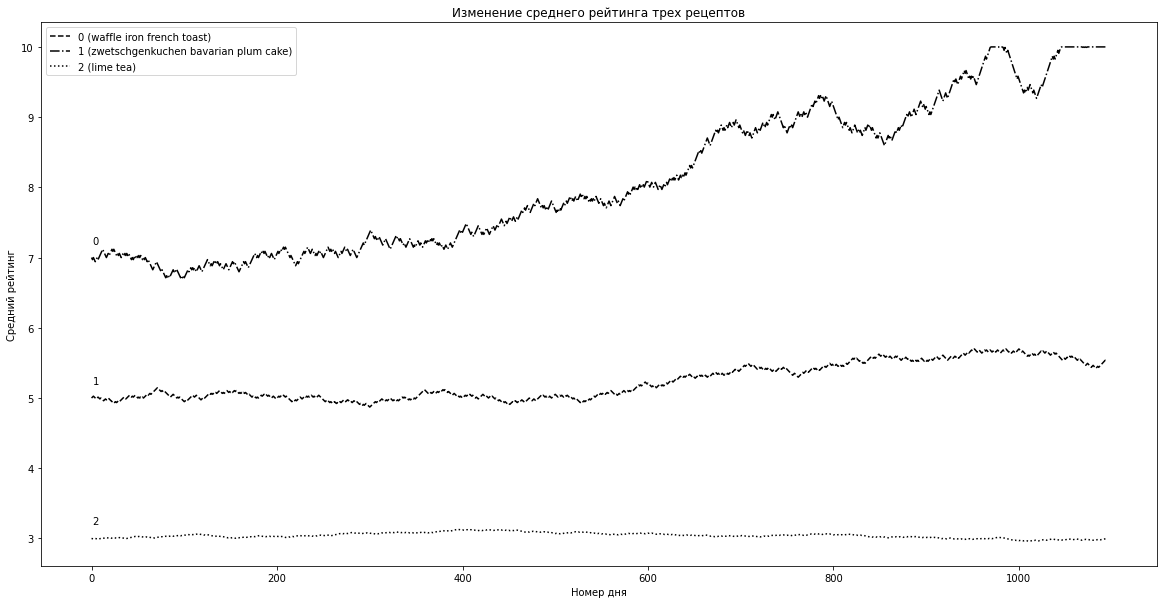

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(data[0], label='0 (waffle iron french toast)', color='black', linestyle = '--')
plt.text(1,7.2,'0')
plt.plot(data[1], label='1 (zwetschgenkuchen bavarian plum cake)', color='black', linestyle = '-.')
plt.text(1,5.2,'1')
plt.plot(data[2], label='2 (lime tea)', color='black', linestyle = ':')
plt.text(1,3.2,'2')
plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.legend();

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


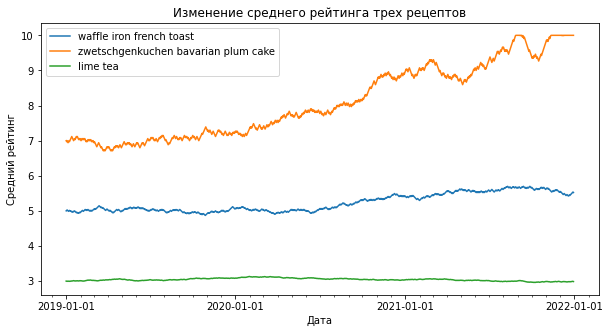

In [ ]:
dr = pd.date_range(start='01.01.2019', end='30.12.2021')
fig, ax = plt.subplots(figsize=(10, 5), nrows=1, ncols=1)

ax.plot(dr, data[0], label='waffle iron french toast')
ax.plot(dr, data[1], label='zwetschgenkuchen bavarian plum cake')
ax.plot(dr, data[2], label='lime tea')
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.legend();

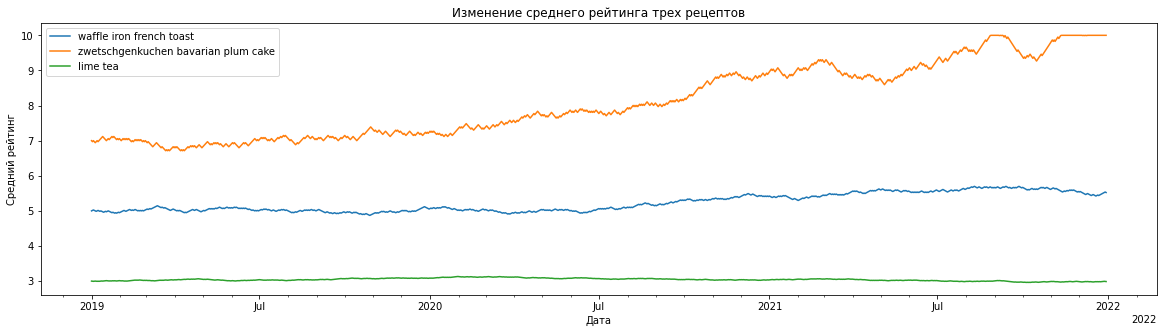

In [ ]:
dr = pd.date_range(start='01.01.2019', end='30.12.2021')
fig, ax = plt.subplots(figsize=(20, 5), nrows=1, ncols=1)

ax.plot(dr, data[0], label='waffle iron french toast')
ax.plot(dr, data[1], label='zwetschgenkuchen bavarian plum cake')
ax.plot(dr, data[2], label='lime tea')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.set_title('Изменение среднего рейтинга трех рецептов')
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.legend();

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

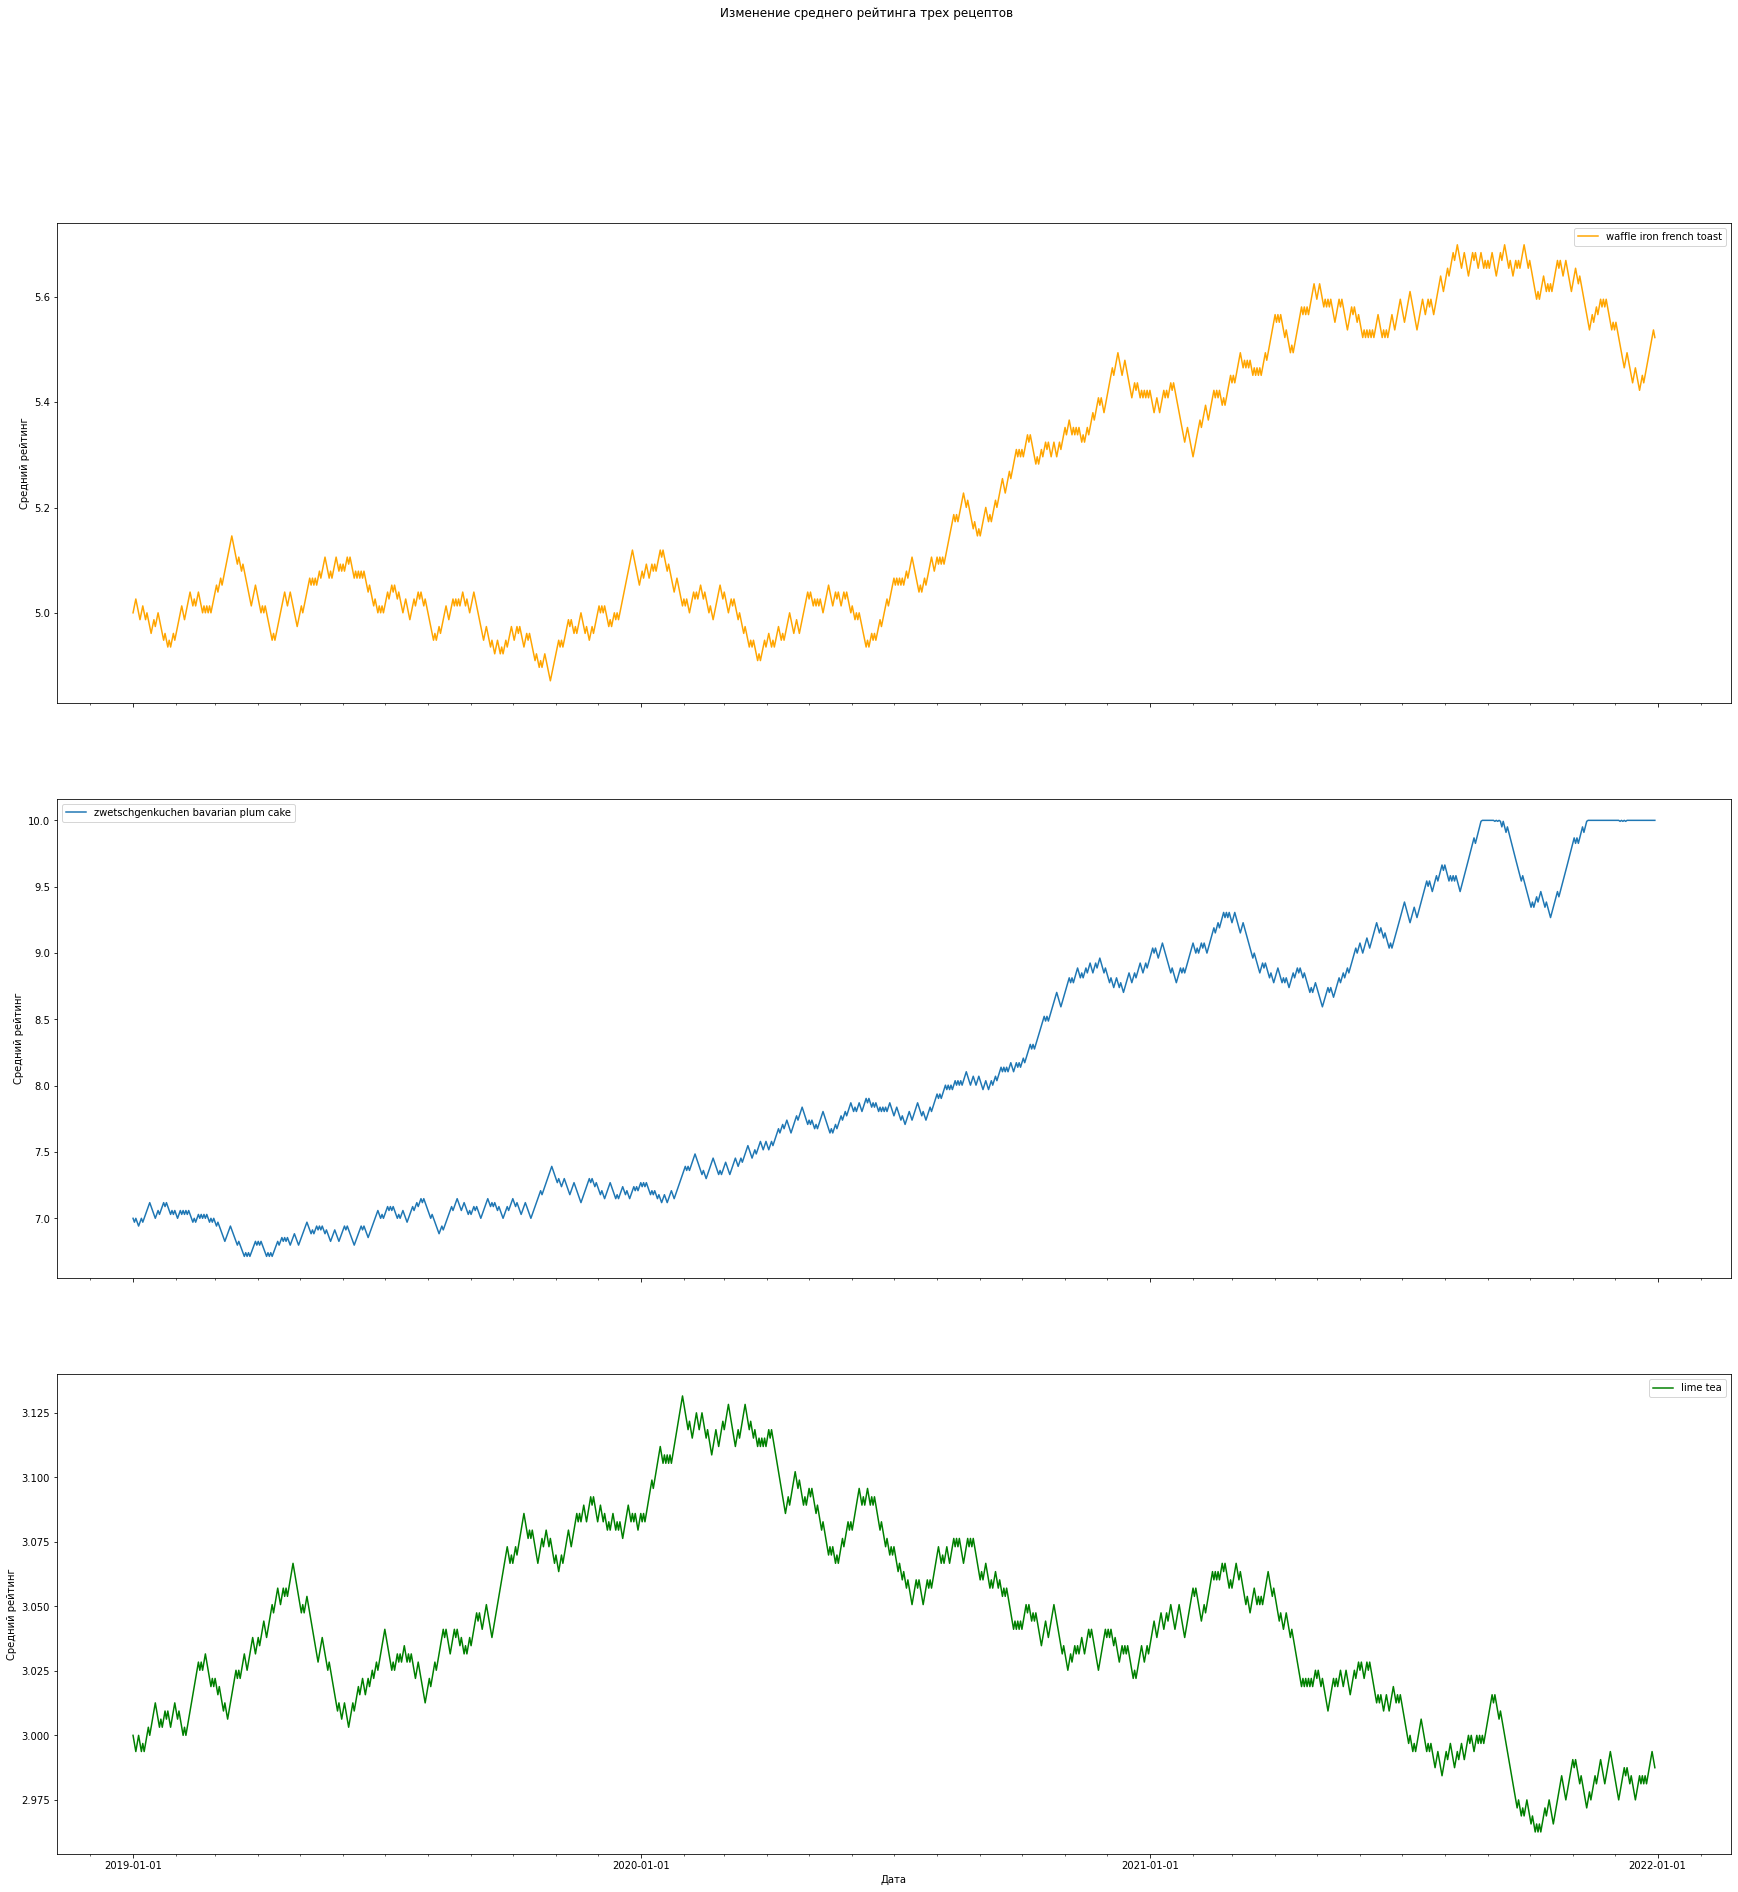

In [ ]:
dr = pd.date_range(start='01.01.2019', end='30.12.2021')
fig, ax = plt.subplots(figsize=(30, 30), nrows=3, ncols=1)

ax[0].plot(dr, data[0], label='waffle iron french toast', color='orange')
ax[1].plot(dr, data[1], label='zwetschgenkuchen bavarian plum cake')
ax[2].plot(dr, data[2], label='lime tea', color='green')
ax[0].tick_params('x', labelbottom=False)
ax[1].tick_params('x', labelbottom=False)
ax[0].xaxis.set_major_locator(mdates.YearLocator(1))
ax[0].xaxis.set_minor_locator(mdates.MonthLocator())
ax[1].xaxis.set_major_locator(mdates.YearLocator(1))
ax[1].xaxis.set_minor_locator(mdates.MonthLocator())
ax[2].xaxis.set_major_locator(mdates.YearLocator(1))
ax[2].xaxis.set_minor_locator(mdates.MonthLocator())
plt.suptitle('Изменение среднего рейтинга трех рецептов')
ax[2].set_xlabel('Дата')
ax[0].set_ylabel('Средний рейтинг')
ax[1].set_ylabel('Средний рейтинг')
ax[2].set_ylabel('Средний рейтинг')
ax[0].legend()
ax[1].legend()
ax[2].legend();

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0.5, 0.98, 'Изменение количества пользователей в линейном и логарифмическом масштабах')

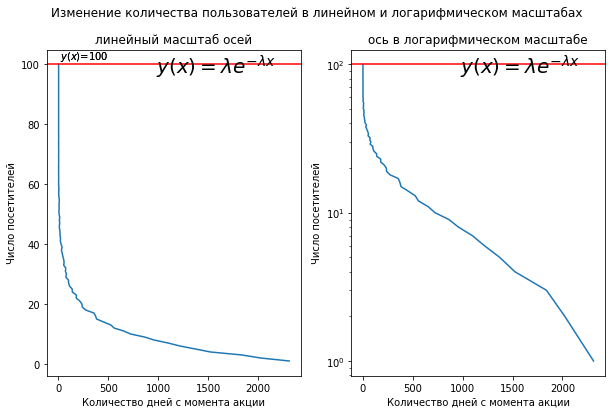

In [ ]:
data4=np.load("visitors.npy")
y=[i for i in range(1,len(data4)+1)]
fig, ax = plt.subplots(1,2, figsize=(10, 6))
formula = r'$y(x)=\lambda e^{-\lambda x}$'
ax[0].plot(data4, y)
ax[0].set_xlabel("Количество дней с момента акции")
ax[0].axhline(y=100, color='r', linestyle='-')
ax[0].text(.9, .99,formula, ha='right', va='top', fontsize=20, transform=ax[0].transAxes)
ax[0].text(.05,.97,'$\ity$($\itx$)=100', fontsize=10, transform=ax[0].transAxes)#ha='right', va='top', 
ax[0].set_ylabel("Число посетителей")
ax[0].set_title('линейный масштаб осей')
ax[1].semilogy(data4, y)
ax[1].set_xlabel("Количество дней с момента акции")
ax[1].axhline(y=100, color='r', linestyle='-')
ax[1].text(.9, .99,formula, ha='right', va='top', fontsize=20, transform=ax[1].transAxes)
ax[1].set_ylabel("Число посетителей")
ax[1].text(.05,.97,'$\ity$($\itx$)=100', fontsize=10, transform=ax[0].transAxes)
ax[1].set_title('ось в логарифмическом масштабе')
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабах')